In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/data-petrol.csv")
df.head()


,PumpID,Pump Name,Brand,Review,Rating,City,State,Latitude,Longitude
0,AP001,Sai Fuel Station,Indian Oil,Good service,3.0,Visakhapatnam,Andhra Pradesh,17.6868,83.2185
1,AP002,RK Petrol Pump,HP,Quick & clean,4.0,Visakhapatnam,Andhra Pradesh,17.6880,83.2210
2,AP003,VSP Fuel Hub,Bharat Petroleum,Friendly staff,4.3,Visakhapatnam,Andhra Pradesh,17.6895,83.2150
3,AP004,Galaxy Fuel,Reliance,Nice amenities,4.1,Visakhapatnam,Andhra Pradesh,17.6872,83.2170
4,AP005,Star Petrol,Indian Oil,Smooth refueling,4.0,Visakhapatnam,Andhra Pradesh,17.6850,83.2205


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2217 entries, 0 to 2216
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PumpID     2211 non-null   object 
 1   Pump Name  2211 non-null   object 
 2   Brand      2211 non-null   object 
 3   Review     2211 non-null   object 
 4   Rating     2211 non-null   float64
 5   City       2211 non-null   object 
 6   State      2211 non-null   object 
 7   Latitude   2210 non-null   float64
 8   Longitude  2210 non-null   float64
dtypes: float64(3), object(6)
memory usage: 156.0+ KB


,Rating,Latitude,Longitude
count,2211.000000,2210.000000,2210.000000
mean,3.759249,22.819991,79.918150
std,0.911842,5.596509,6.876587
min,1.000000,8.171100,69.666200
25%,3.000000,19.714250,74.944700
50%,4.000000,23.283750,77.594600
75%,4.200000,26.709125,84.856425
max,5.000000,32.551000,95.376000


In [4]:
df.isna().sum()

PumpID       6
Pump Name    6
Brand        6
Review       6
Rating       6
City         6
State        6
Latitude     7
Longitude    7
dtype: int64

In [5]:
print("Number of unique states:", df['State'].nunique())
print("Number of unique cities:", df['City'].nunique())

print("States:\n", df['State'].unique())
print("Sample cities:\n", df['City'].unique()[:20])


Number of unique states: 28
Number of unique cities: 373
States:
 ['Andhra Pradesh' 'Arunachal Pradesh' nan 'Assam' 'Bihar' 'Chhattisgarh'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram'
 'Nagaland' 'Odisha' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu'
 'Telangana' 'Tripura' 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']
Sample cities:
 ['Visakhapatnam' 'Vijayawada' 'Guntur' 'Kakinada' 'Rajahmundry' 'Nellore'
 'Tirupati' 'Anantapur' 'Kurnool' 'Kadapa' 'Ongole' 'Eluru' 'Chittoor'
 'Vizianagaram' 'Srikakulam' 'Rajamahendravaram' 'Itanagar' 'Naharlagun'
 'Pasighat' nan]


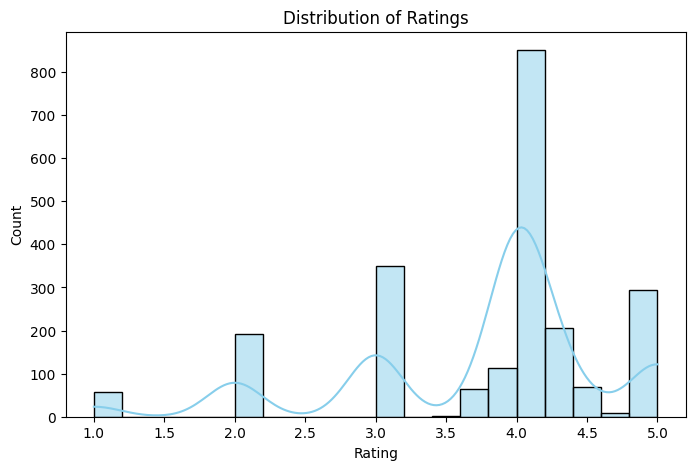

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df['Rating'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

C:\Users\gitan\AppData\Local\Temp\ipykernel_15244\2886757731.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_ratings.index, y=state_ratings.values, palette="viridis")


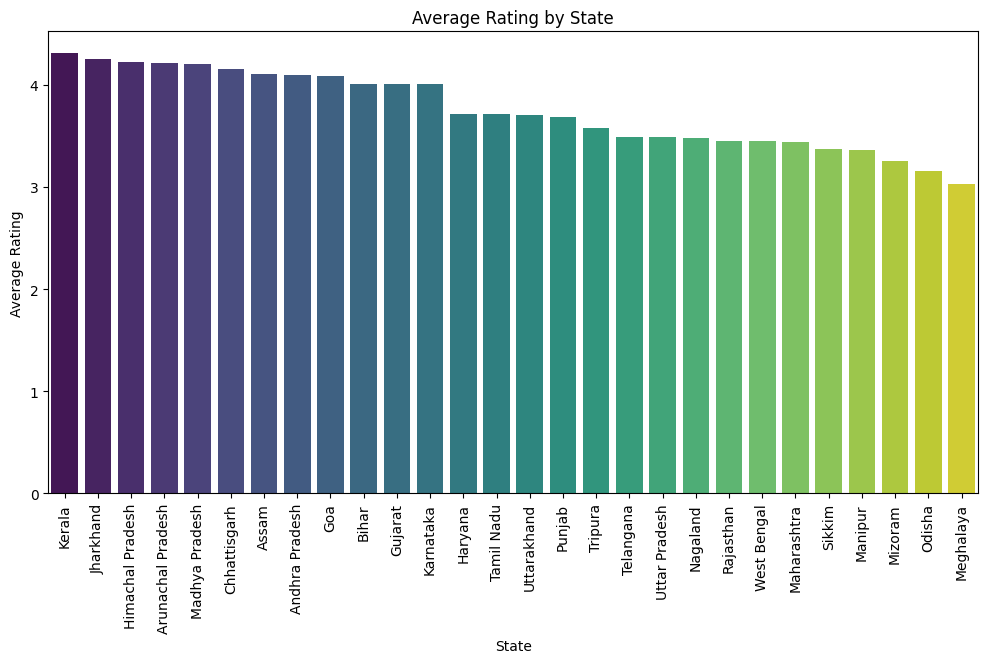

In [7]:
state_ratings = df.groupby('State')['Rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=state_ratings.index, y=state_ratings.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Average Rating by State")
plt.ylabel("Average Rating")
plt.show()


In [8]:
top_pumps = df.sort_values(by='Rating', ascending=False).head(10)
top_pumps[['Pump Name','Brand','City','State','Rating']]


,Pump Name,Brand,City,State,Rating
2188,NorthBarrack Fuel,BharatPetro,Barrackpore,West Bengal,5.0
2216,EastFuel Purulia,IndianOil,Purulia,West Bengal,5.0
2176,Bardhaman Quick,HP,Bardhaman,West Bengal,5.0
2177,NorthFuel Station,IndianOil,Asansol,West Bengal,5.0
2168,NorthTown Fuel,HP,Siliguri,West Bengal,5.0
2172,Bardhaman Pump,IndianOil,Bardhaman,West Bengal,5.0
2160,BayFuel Station,BharatPetro,Howrah,West Bengal,5.0
2162,Durgapur Fuel Hub,HP,Durgapur,West Bengal,5.0
2166,CityLine Fuel,IndianOil,Durgapur,West Bengal,5.0
2151,RapidFuel Stop,HPCL,Haldwani,Uttarakhand,5.0


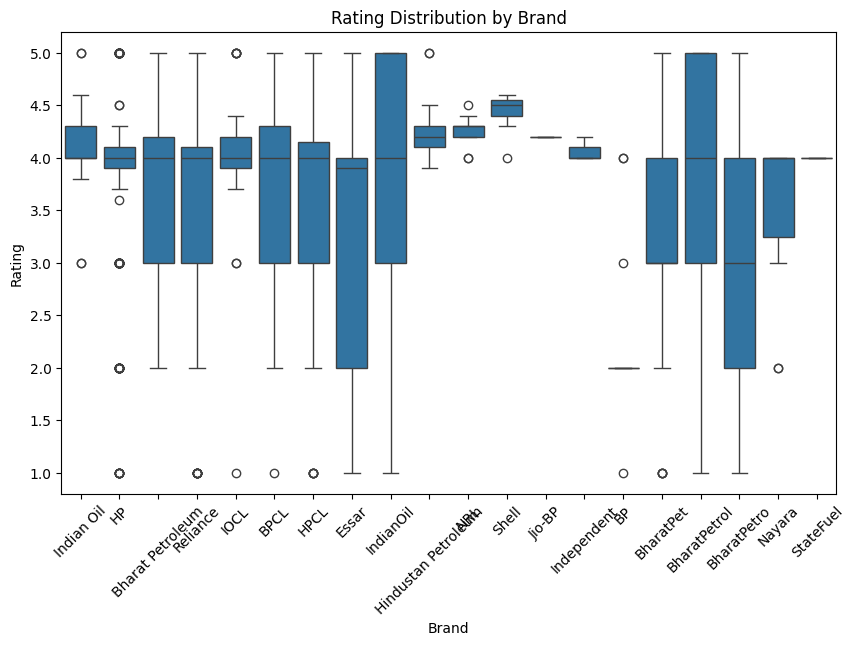

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Brand', y='Rating', data=df)
plt.xticks(rotation=45)
plt.title("Rating Distribution by Brand")
plt.show()


C:\Users\gitan\AppData\Local\Temp\ipykernel_15244\332154095.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_reviews.index[:20], y=city_reviews.values[:20], palette="coolwarm")


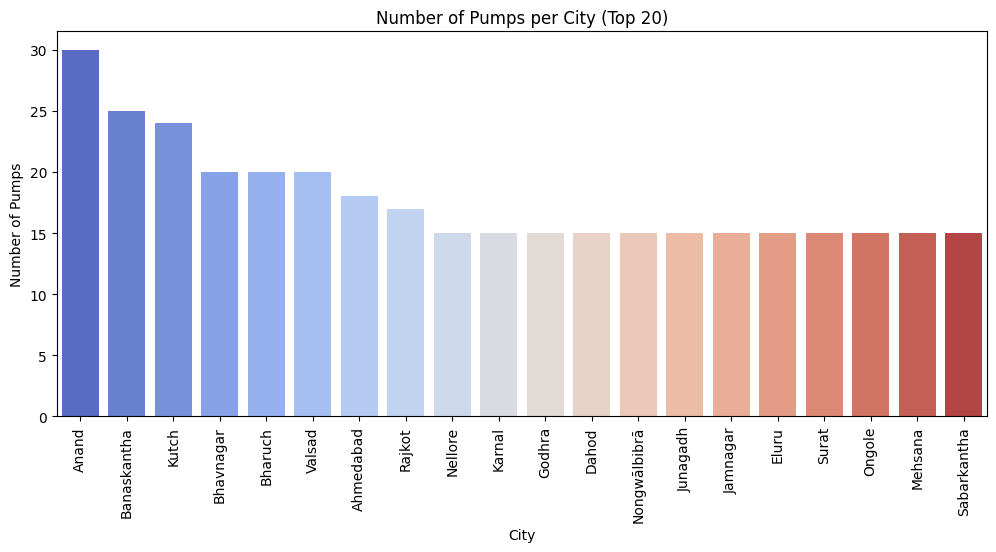

In [10]:
city_reviews = df.groupby('City')['Rating'].count().sort_values(ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(x=city_reviews.index[:20], y=city_reviews.values[:20], palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Number of Pumps per City (Top 20)")
plt.ylabel("Number of Pumps")
plt.show()


In [11]:
if 'Num_Reviews' in df.columns:
    plt.figure(figsize=(7,5))
    sns.scatterplot(x='Num_Reviews', y='Rating', data=df)
    plt.title("Rating vs Number of Reviews")
    plt.show()


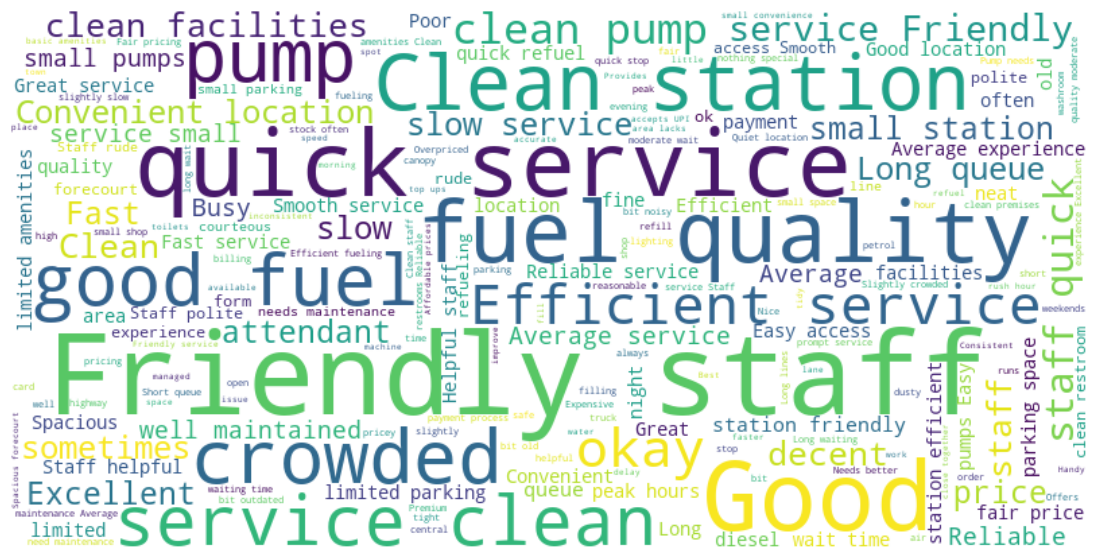

In [12]:
from wordcloud import WordCloud

text = " ".join(df['Review'].dropna().values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
